# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

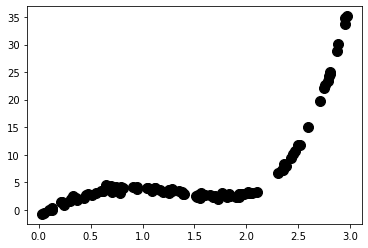

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 2.24568973,  3.73895537, 14.91601694,  4.2192144 ,  0.55601225,
       25.08355049,  3.19366928,  1.12243494,  0.49997631, 19.35535907,
        0.50083459,  0.53829587,  3.37091922,  6.40870455,  2.77083342,
        4.74044248, 12.07468781,  0.88200614, 12.3371257 ,  0.96511671,
       20.55388068,  7.13169253,  5.92626626,  3.51085535,  2.48823646,
        4.55788209,  5.58633278, 12.43269448,  3.86030212,  4.8765709 ,
        5.51089283,  6.01910939,  0.56077025, 23.39979155,  7.4193171 ,
        4.49378619,  1.31566763,  0.73566129, 25.49699375,  2.26577047])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.8076637573564944
Explained variance score: 0.8076637573564944
Median absolute error: 3.1830539887712694
Mean squared error: 14.865068373700518
Mean absolute errors: 3.202031484347038


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [7]:
for i in {2,3,4,5,25}:
    print(i,":")
    X_train=np.vstack(X_train)
    X_test=np.vstack(X_test)
    model2 = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
    model2.fit(X_train, y_train)
    model2.predict(X_test)
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

2 :
Explained variance score: 0.8076637573564944
Explained variance score: 0.8076637573564944
Median absolute error: 3.1830539887712694
Mean squared error: 14.865068373700518
Mean absolute errors: 3.202031484347038
3 :
Explained variance score: 0.9928095937038901
Explained variance score: 0.9928095937038901
Median absolute error: 0.5717691008957944
Mean squared error: 0.6463009764382689
Mean absolute errors: 0.6375995333936537
4 :
Explained variance score: 0.998598661036693
Explained variance score: 0.998598661036693
Median absolute error: 0.22141919134424978
Mean squared error: 0.1259300946830478
Mean absolute errors: 0.2880437444958962
5 :
Explained variance score: 0.9985908969261575
Explained variance score: 0.9985908969261575
Median absolute error: 0.2244383905080046
Mean squared error: 0.12618236653457238
Mean absolute errors: 0.28896196744731756
25 :
Explained variance score: 0.9931709744217211
Explained variance score: 0.9931709744217211
Median absolute error: 0.3017439456501154